### Business Goal

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import warnings
warnings.filterwarnings('ignore')
style.use('default')
import seaborn as sns
playstore = pd.read_csv("googleplaystore.csv")
print(playstore.shape)

(10841, 13)


### Cleaning the Data

In [191]:
playstore.iloc[10472:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


In [192]:
playstore.drop(labels=10472,inplace=True)

In [193]:
playstore['Price']=playstore['Price'].str.replace('$','').astype('float')

In [194]:
paid = playstore[playstore['Price']!=0].copy()

In [195]:
paid.drop(columns=['Type'],inplace=True)

In [196]:
paid['Reviews']=paid['Reviews'].astype('float')

In [197]:
def clean_size(size):
    """Convert file size string to float and megabytes"""
    size = size.replace("M","")
    if size.endswith("k"):
        size = float(size[:-1])/1000
    elif size == "Varies with device":
        size = pd.np.NaN
    else:
        size = float(size)
    return size

In [198]:
paid['Size']=paid['Size'].apply(clean_size)
paid['Price']=paid['Price'].astype(int)

In [199]:
paid['Size'].value_counts(bins=5)

(-0.087, 20.011]    479
(20.011, 40.008]    126
(40.008, 60.006]     66
(60.006, 80.003]     32
(80.003, 100.0]      21
Name: Size, dtype: int64

In [200]:
paid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 234 to 10798
Data columns (total 12 columns):
App               800 non-null object
Category          800 non-null object
Rating            647 non-null float64
Reviews           800 non-null float64
Size              724 non-null float64
Installs          800 non-null object
Price             800 non-null int64
Content Rating    800 non-null object
Genres            800 non-null object
Last Updated      800 non-null object
Current Ver       798 non-null object
Android Ver       799 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 81.2+ KB


### Investigating Duplicates

In [201]:
paid[paid.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6.800,"100,000+",4,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39.000,"100,000+",4,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
1347,Pocket Yoga,HEALTH_AND_FITNESS,4.4,2107.0,NaN,"100,000+",2,Everyone,Health & Fitness,"December 22, 2015",Varies with device,Varies with device
2202,Avokiddo Emotions,FAMILY,4.6,73.0,12.000,"1,000+",2,Everyone,Education;Pretend Play,"May 21, 2018",1.7.0,4.0.3 and up
2203,Nighty Night Circus,FAMILY,4.3,382.0,15.000,"10,000+",2,Everyone,Education;Action & Adventure,"March 7, 2017",2.6,2.3 and up
2204,Sago Mini Babies,FAMILY,4.5,253.0,83.000,"10,000+",3,Everyone,Education;Pretend Play,"October 28, 2016",1.1,4.0.3 and up
2205,Dr. Panda & Toto's Treehouse,FAMILY,4.4,3396.0,9.500,"50,000+",3,Everyone,Casual;Pretend Play,"December 9, 2014",1.8,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92.0,32.000,"1,000+",79,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2366,Monash Uni Low FODMAP Diet,MEDICAL,4.2,1135.0,12.000,"100,000+",9,Everyone,Medical,"July 16, 2018",2.0.7,4.0 and up
2372,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2921.0,25.000,"100,000+",24,Everyone,Medical,"May 25, 2018",2018.5.47,5.0 and up


In [202]:
paid[paid['App']=='iBP Blood Pressure']

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2244,iBP Blood Pressure,MEDICAL,4.4,578.0,0.704,"10,000+",0,Everyone,Medical,"November 30, 2014",7.0.1,2.2 and up
6584,iBP Blood Pressure,MEDICAL,4.4,578.0,0.704,"10,000+",0,Everyone,Medical,"November 30, 2014",7.0.1,2.2 and up


In [203]:
paid.duplicated(subset=['App']).sum()

44

In [204]:
print(
    "Number of rows before dropping duplicates: {}".format(paid.shape[0])
)
paid.drop_duplicates(inplace=True)
print(
    "Number of rows after dropping duplicates: {}".format(paid.shape[0])
)

Number of rows before dropping duplicates: 800
Number of rows after dropping duplicates: 765


In [205]:
paid[paid.duplicated(subset=['App'], keep=False)].sort_values(by=['App'])

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6652,Camera FV-5,PHOTOGRAPHY,3.8,16317.0,NaN,"100,000+",3,Everyone,Photography,"November 10, 2017",Varies with device,Varies with device
2913,Camera FV-5,PHOTOGRAPHY,3.8,16320.0,NaN,"100,000+",3,Everyone,Photography,"November 10, 2017",Varies with device,Varies with device
8785,Dr. Panda & Toto's Treehouse,FAMILY,4.4,3397.0,9.5,"50,000+",3,Everyone,Casual;Pretend Play,"December 9, 2014",1.8,4.0 and up
2192,Dr. Panda & Toto's Treehouse,FAMILY,4.4,3396.0,9.5,"50,000+",3,Everyone,Casual;Pretend Play,"December 9, 2014",1.8,4.0 and up
852,Fuzzy Numbers: Pre-K Number Foundation,EDUCATION,4.7,21.0,44.0,"1,000+",5,Everyone,Education;Education,"July 21, 2017",1.3,4.1 and up
4301,Fuzzy Numbers: Pre-K Number Foundation,FAMILY,4.7,21.0,44.0,"1,000+",5,Everyone,Education;Education,"July 21, 2017",1.3,4.1 and up
6919,HD Widgets,PERSONALIZATION,4.3,58614.0,26.0,"1,000,000+",0,Everyone,Personalization,"December 7, 2016",4.3.2,4.4 and up
3405,HD Widgets,PERSONALIZATION,4.3,58617.0,26.0,"1,000,000+",0,Everyone,Personalization,"December 7, 2016",4.3.2,4.4 and up
2251,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2921.0,25.0,"100,000+",24,Everyone,Medical,"May 25, 2018",2018.5.47,5.0 and up
9574,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2923.0,25.0,"100,000+",24,Everyone,Medical,"May 25, 2018",2018.5.47,5.0 and up


In [206]:
paid.drop([2151,4301],inplace=True)

In [207]:
paid=paid.sort_values(by=['Reviews'], ascending=False)
paid.drop_duplicates(subset='App',keep='first',inplace=True)

In [208]:
paid.duplicated("App").sum()

0

In [209]:
paid=paid.reset_index(drop=True)

In [210]:
paid.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Minecraft,FAMILY,4.5,2376564.0,NaN,"10,000,000+",6,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device
1,Hitman Sniper,GAME,4.6,408292.0,29.0,"10,000,000+",0,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up
2,Grand Theft Auto: San Andreas,GAME,4.4,348962.0,26.0,"1,000,000+",6,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up
3,Bloons TD 5,FAMILY,4.6,190086.0,94.0,"1,000,000+",2,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up
4,Where's My Water?,FAMILY,4.7,188740.0,69.0,"1,000,000+",1,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up


### Exploring the Price and Rating

In [211]:
def data_distribution(column):
 f, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(16,8))
 sns.swarmplot(x=column, ax=ax1)
 sns.boxplot(x=column,ax=ax2)
 sns.histplot(data=paid, x=column, ax=ax3, bins=10)
 sns.kdeplot(data=paid, x=column,ax=ax4)

 axes = [ax1, ax2, ax3, ax4]

 ### Changes to all the subplots
 for ax in axes:
    ax.tick_params(bottom=False, left=False,top=False)
    for location in ['left', 'right', 'bottom', 'top']:
       ax.spines[location].set_visible(False)  #used to remove the splines 


#### Outliers affecting the Price Distribution, which is skewed towards less than 50

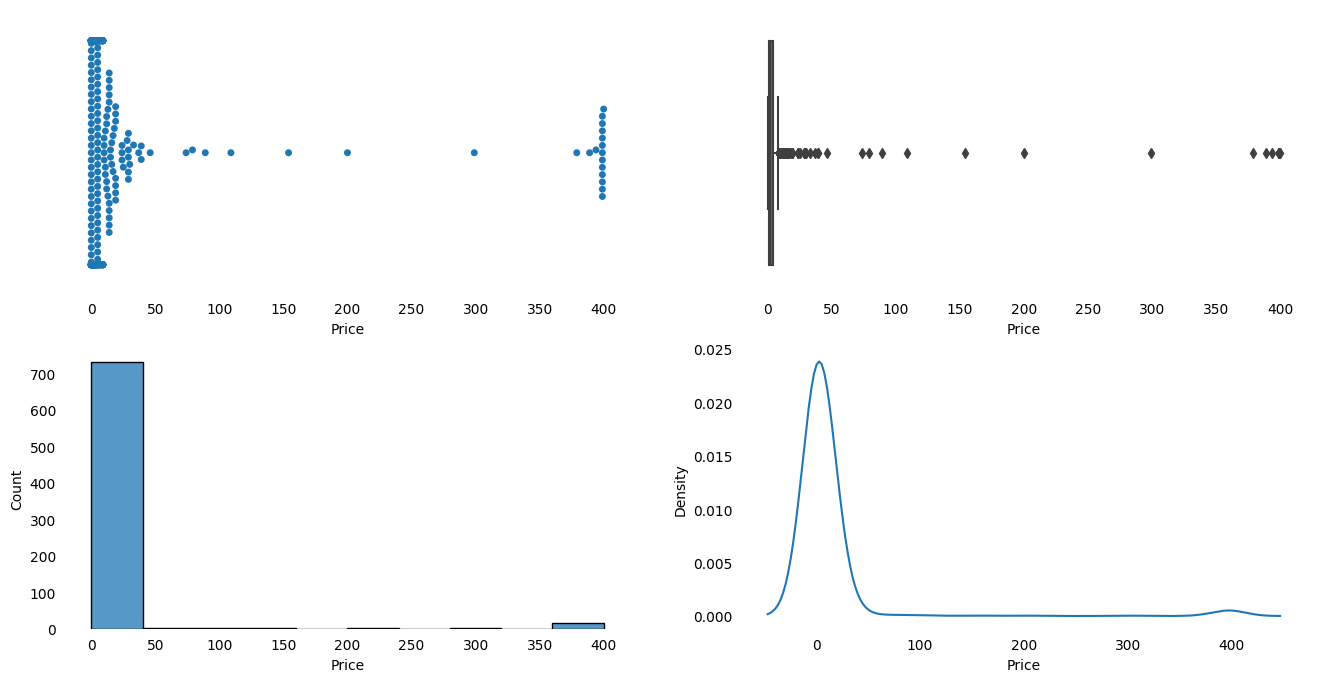

In [212]:
data_distribution(paid["Price"])

In [213]:
affordable_apps = paid[paid["Price"]<50].copy()

#### Outliers affecting the Price Distribution, even for prices than 50

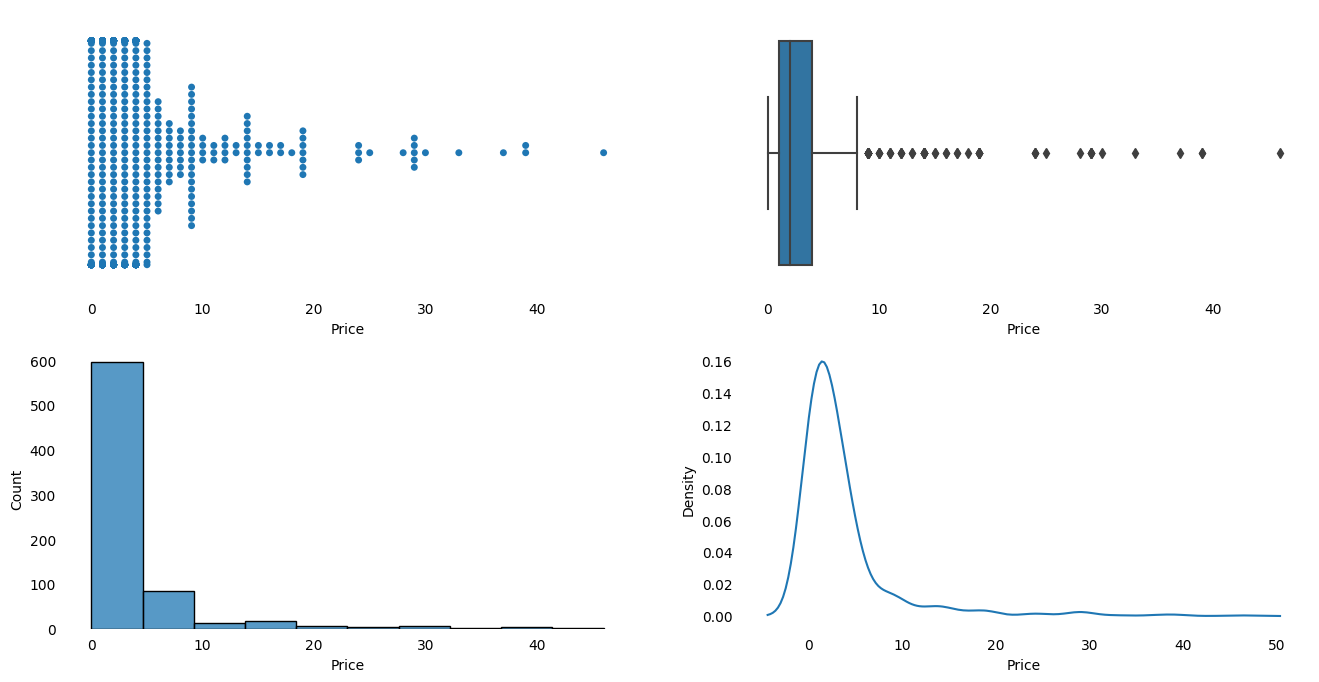

In [214]:
data_distribution(affordable_apps["Price"])

#### Creating Masks for Apps Prices below 5 as Cheap and above 5 as Reasonable

In [215]:
cheap = affordable_apps["Price"] < 5
reasonable = affordable_apps["Price"] >= 5


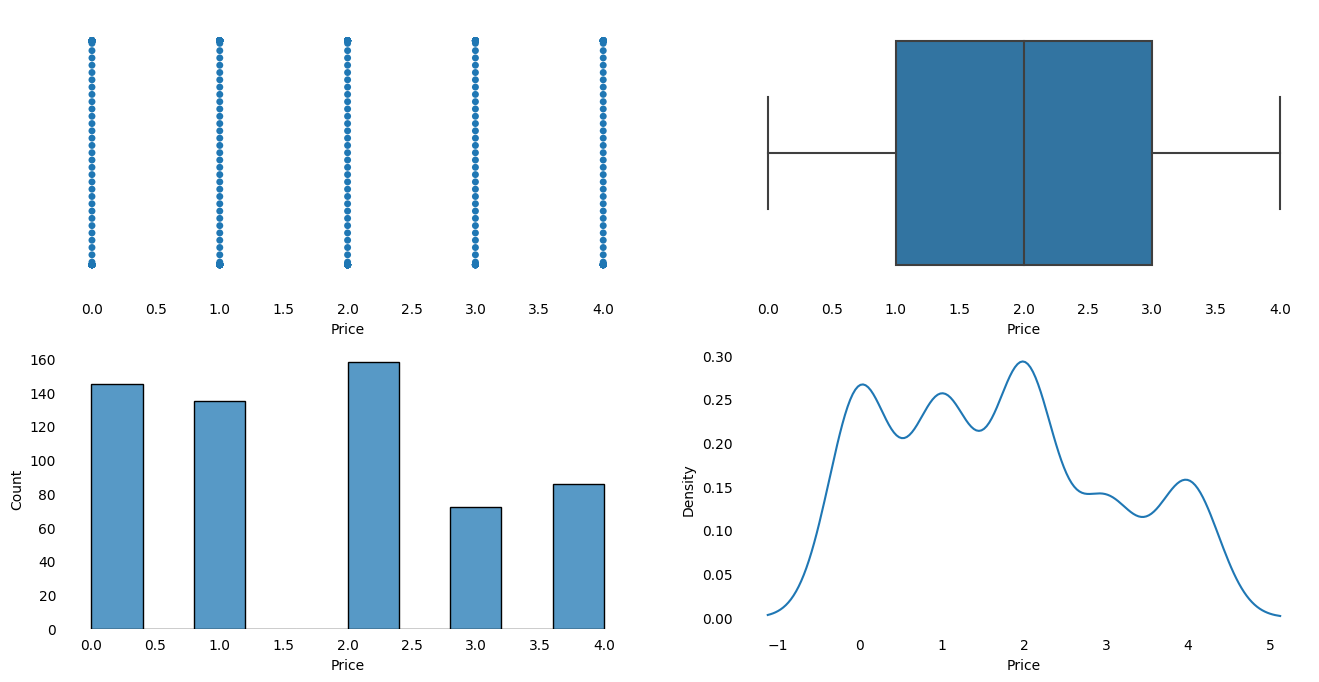

In [216]:
data_distribution(affordable_apps[cheap]["Price"])

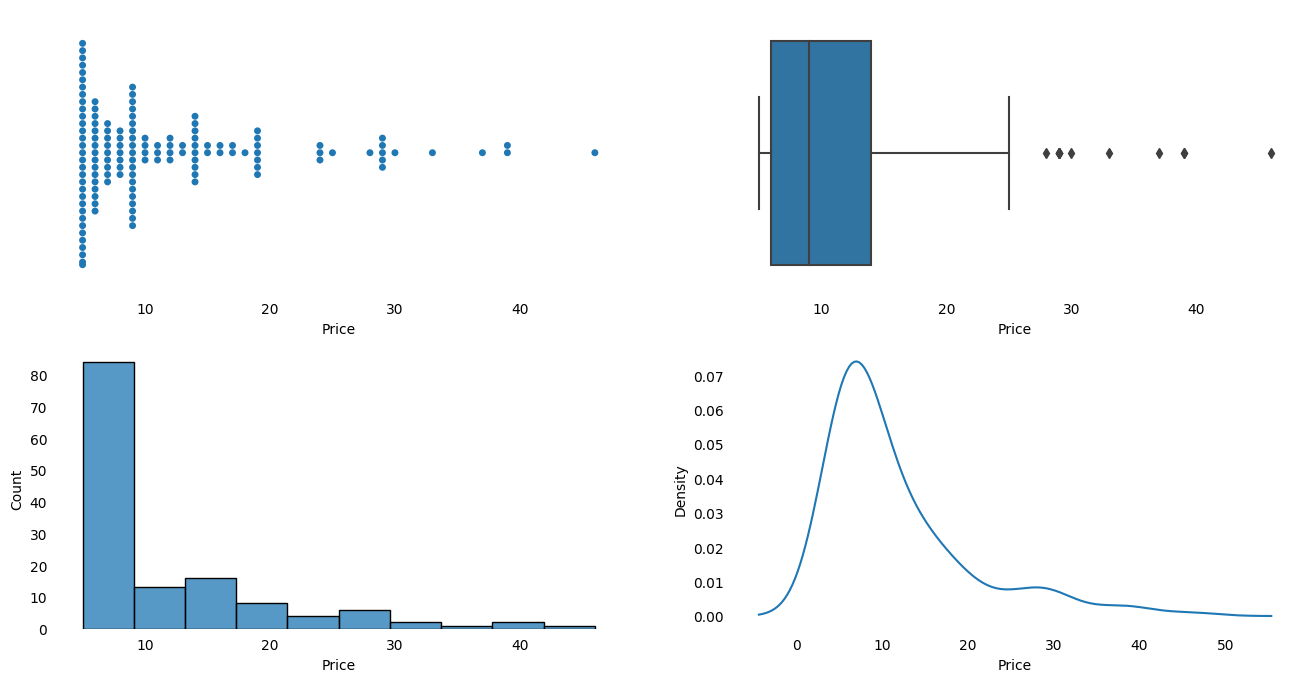

In [217]:
data_distribution(affordable_apps[reasonable]["Price"])

In [218]:
affordable_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Minecraft,FAMILY,4.5,2376564.0,NaN,"10,000,000+",6,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device
1,Hitman Sniper,GAME,4.6,408292.0,29.0,"10,000,000+",0,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up
2,Grand Theft Auto: San Andreas,GAME,4.4,348962.0,26.0,"1,000,000+",6,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up
3,Bloons TD 5,FAMILY,4.6,190086.0,94.0,"1,000,000+",2,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up
4,Where's My Water?,FAMILY,4.7,188740.0,69.0,"1,000,000+",1,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up


#### Adding Coulmns for Affordability 

In [219]:
affordable_apps["affordability"] = affordable_apps['Price'].apply(lambda x: "cheap" if x < 5 else "reasonable")

#### Calculating co-relation between Price and Rating 

In [220]:
print(affordable_apps[cheap].corr().loc["Rating", "Price"])

-0.056252687823296024


In [221]:
cheap_mean = affordable_apps[cheap]['Price'].mean()

In [222]:
reasonable_mean= affordable_apps.loc[reasonable,'Price'].mean()

In [223]:
affordable_apps.loc[cheap,'price_criterion']=affordable_apps.loc[cheap,'Price'].apply(lambda x: 1 if x<cheap_mean else 0)

In [224]:
affordable_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion
0,Minecraft,FAMILY,4.5,2376564.0,NaN,"10,000,000+",6,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,reasonable,NaN
1,Hitman Sniper,GAME,4.6,408292.0,29.0,"10,000,000+",0,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,cheap,1.0
2,Grand Theft Auto: San Andreas,GAME,4.4,348962.0,26.0,"1,000,000+",6,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,reasonable,NaN
3,Bloons TD 5,FAMILY,4.6,190086.0,94.0,"1,000,000+",2,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,cheap,0.0
4,Where's My Water?,FAMILY,4.7,188740.0,69.0,"1,000,000+",1,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,cheap,1.0


In [225]:
affordable_apps.loc[reasonable,'price_criterion']=affordable_apps.loc[reasonable,'Price'].apply(lambda x: 1 if x<reasonable_mean else 0)

In [226]:
affordable_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion
0,Minecraft,FAMILY,4.5,2376564.0,NaN,"10,000,000+",6,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,reasonable,1.0
1,Hitman Sniper,GAME,4.6,408292.0,29.0,"10,000,000+",0,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,cheap,1.0
2,Grand Theft Auto: San Andreas,GAME,4.4,348962.0,26.0,"1,000,000+",6,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,reasonable,1.0
3,Bloons TD 5,FAMILY,4.6,190086.0,94.0,"1,000,000+",2,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,cheap,0.0
4,Where's My Water?,FAMILY,4.7,188740.0,69.0,"1,000,000+",1,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,cheap,1.0


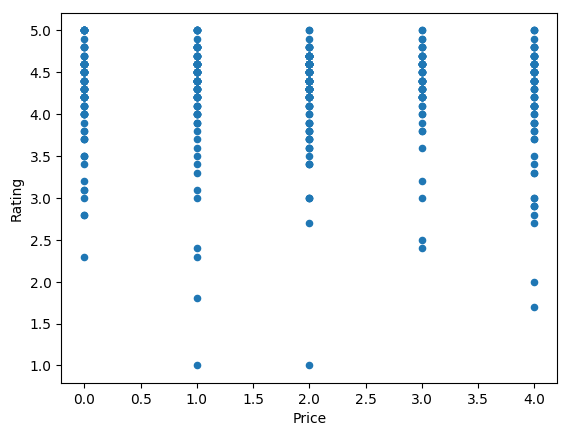

In [227]:
affordable_apps[cheap].plot(kind="scatter", x="Price", y="Rating")

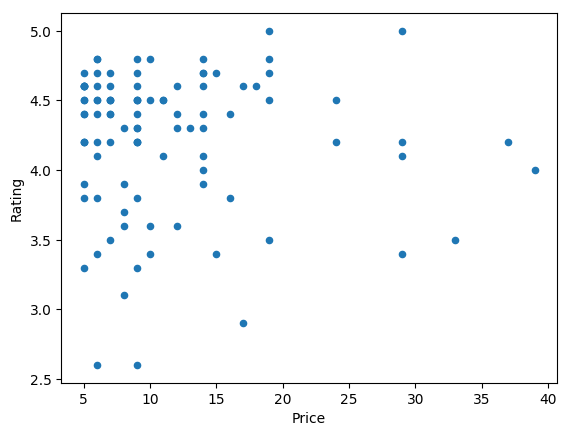

In [228]:
affordable_apps[reasonable].plot(kind="scatter", x="Price", y="Rating")

In [232]:
print(affordable_apps[cheap].corr().loc['Rating','Price'])

-0.056252687823296024


### Exploring Price Vs Category/Genre

In [233]:
affordable_apps['Category'].unique()

array(['FAMILY', 'GAME', 'SPORTS', 'PERSONALIZATION', 'PRODUCTIVITY',
       'WEATHER', 'TOOLS', 'COMMUNICATION', 'PHOTOGRAPHY', 'EDUCATION',
       'LIFESTYLE', 'FINANCE', 'HEALTH_AND_FITNESS', 'TRAVEL_AND_LOCAL',
       'BUSINESS', 'PARENTING', 'ENTERTAINMENT', 'MAPS_AND_NAVIGATION',
       'VIDEO_PLAYERS', 'MEDICAL', 'AUTO_AND_VEHICLES', 'FOOD_AND_DRINK',
       'DATING', 'BOOKS_AND_REFERENCE', 'ART_AND_DESIGN', 'SHOPPING',
       'SOCIAL', 'NEWS_AND_MAGAZINES', 'LIBRARIES_AND_DEMO'], dtype=object)

In [236]:
affordable_apps['Genres'].unique()

array(['Arcade;Action & Adventure', 'Action', 'Strategy',
       'Puzzle;Brain Games', 'Card;Action & Adventure', 'Sports',
       'Personalization', 'Arcade', 'Puzzle', 'Productivity', 'Weather',
       'Tools', 'Sports;Action & Adventure', 'Communication',
       'Role Playing', 'Photography', 'Card', 'Simulation;Education',
       'Adventure', 'Education;Pretend Play', 'Lifestyle',
       'Strategy;Action & Adventure', 'Board', 'Finance',
       'Health & Fitness', 'Role Playing;Action & Adventure', 'Music',
       'Travel & Local', 'Business', 'Simulation',
       'Adventure;Action & Adventure', 'Parenting',
       'Adventure;Brain Games', 'Entertainment', 'Maps & Navigation',
       'Video Players & Editors', 'Racing', 'Medical', 'Auto & Vehicles',
       'Educational;Pretend Play', 'Casual;Pretend Play',
       'Education;Creativity', 'Education', 'Board;Brain Games',
       'Food & Drink', 'Action;Action & Adventure',
       'Simulation;Pretend Play', 'Dating', 'Books & Referenc

In [237]:
affordable_apps["genre_count"] = affordable_apps["Genres"].str.count(";")+1

In [241]:
genres_mean = affordable_apps.groupby(
    ["affordability", "genre_count"]
).mean()[["Price"]]
genres_mean

Price
affordability genre_count           
cheap         1             1.631380
              2             2.208955
reasonable    1            11.679104
              2             6.000000

In [243]:
genres_mean.loc["cheap",2]['Price']

2.208955223880597

In [244]:
def label_genres(row):
    """For each segment in `genres_mean`,
    labels the apps that cost less than its segment's mean with `1`
    and the others with `0`."""

    aff = row["affordability"]
    gc = row["genre_count"]
    price = row["Price"]

    if price < genres_mean.loc[(aff, gc)][0]:
        return 1
    else:
        return 0

affordable_apps["genre_criterion"] = affordable_apps.apply(
    label_genres, axis="columns"
)

In [247]:
categories_mean= affordable_apps.groupby(["affordability", "Category"]).mean()['Price']

In [248]:
categories_mean

affordability  Category           
cheap          ART_AND_DESIGN          1.000000
               AUTO_AND_VEHICLES       1.000000
               BOOKS_AND_REFERENCE     1.714286
               BUSINESS                2.714286
               COMMUNICATION           1.576923
               DATING                  2.250000
               EDUCATION               3.000000
               ENTERTAINMENT           3.000000
               FAMILY                  1.850649
               FINANCE                 2.500000
               FOOD_AND_DRINK          3.500000
               GAME                    1.597222
               HEALTH_AND_FITNESS      2.090909
               LIBRARIES_AND_DEMO      0.000000
               LIFESTYLE               2.100000
               MAPS_AND_NAVIGATION     0.666667
               MEDICAL                 1.833333
               NEWS_AND_MAGAZINES      1.000000
               PARENTING               4.000000
               PERSONALIZATION         0.873418
     

In [251]:
categories_mean.loc['cheap','WEATHER']

2.3333333333333335

In [262]:
def label_categories(row):
    x=row['affordability']
    y=row['Category']
    #print(categories_mean.loc[(x,y)]['Price'])
    if row['Price']  < categories_mean.loc[(x,y)]:
      return 1
    else:
       return 0

affordable_apps['category_criterion']=affordable_apps.apply(label_categories, axis="columns")

In [263]:
affordable_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion,category_criterion
0,Minecraft,FAMILY,4.5,2376564.0,NaN,"10,000,000+",6,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,reasonable,1.0,2,0,1
1,Hitman Sniper,GAME,4.6,408292.0,29.0,"10,000,000+",0,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,cheap,1.0,1,1,1
2,Grand Theft Auto: San Andreas,GAME,4.4,348962.0,26.0,"1,000,000+",6,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,reasonable,1.0,1,1,1
3,Bloons TD 5,FAMILY,4.6,190086.0,94.0,"1,000,000+",2,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,cheap,0.0,1,0,0
4,Where's My Water?,FAMILY,4.7,188740.0,69.0,"1,000,000+",1,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,cheap,1.0,2,1,1


In [266]:
criteria = ["price_criterion", "genre_criterion", "category_criterion"]
affordable_apps["Result"] = affordable_apps[criteria].mode(axis='columns')

affordable_apps.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion,category_criterion,Result
26,Stickman Legends: Shadow Wars,GAME,4.4,38419.0,100.0,"1,000,000+",0,Everyone 10+,Action,"August 3, 2018",2.3.24,4.1 and up,cheap,1.0,1,1,1,1.0
235,TV Guide BR Gold,FAMILY,4.4,544.0,NaN,"5,000+",1,Everyone,Entertainment,"August 20, 2017",Varies with device,Varies with device,cheap,1.0,1,1,1,1.0
286,Sago Mini Babies,FAMILY,4.5,253.0,83.0,"10,000+",3,Everyone,Education;Pretend Play,"October 28, 2016",1.1,4.0.3 and up,cheap,0.0,2,0,0,0.0
675,Es-Bg Offline Voice Translator,TRAVEL_AND_LOCAL,NaN,1.0,87.0,10+,1,Everyone,Travel & Local,"March 19, 2017",2.55,3.0 and up,cheap,1.0,1,1,1,1.0
47,Clue,GAME,4.6,19922.0,35.0,"100,000+",1,Everyone 10+,Board,"July 30, 2018",2.2.5,5.0 and up,cheap,1.0,1,1,1,1.0


### Results & Impact

In [267]:
nr_eligible = affordable_apps["Result"].sum()
print(nr_eligible, nr_eligible/affordable_apps.shape[0], sep="\n")

371.0
0.5061391541609823


In [273]:
affordable_apps.loc[cheap,'New_Price']=affordable_apps.apply(lambda row: round(max(row['Price'],cheap_mean),2),axis="columns")
affordable_apps.loc[reasonable,'New_Price']=affordable_apps.apply(lambda row: round(max(row['Price'],reasonable_mean),2),axis="columns")

In [274]:
affordable_apps

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion,category_criterion,Result,New_Price
0,Minecraft,FAMILY,4.5,2376564.0,NaN,"10,000,000+",6,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,reasonable,1.0,2,0,1,1.0,11.55
1,Hitman Sniper,GAME,4.6,408292.0,29.000,"10,000,000+",0,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,cheap,1.0,1,1,1,1.0,1.70
2,Grand Theft Auto: San Andreas,GAME,4.4,348962.0,26.000,"1,000,000+",6,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,reasonable,1.0,1,1,1,1.0,11.55
3,Bloons TD 5,FAMILY,4.6,190086.0,94.000,"1,000,000+",2,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,cheap,0.0,1,0,0,0.0,2.00
4,Where's My Water?,FAMILY,4.7,188740.0,69.000,"1,000,000+",1,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,cheap,1.0,2,1,1,1.0,1.70
5,Card Wars - Adventure Time,FAMILY,4.3,129603.0,23.000,"1,000,000+",2,Everyone 10+,Card;Action & Adventure,"February 11, 2016",1.11.0,2.3.3 and up,cheap,0.0,2,1,0,0.0,2.00
6,True Skate,SPORTS,4.4,129409.0,73.000,"1,000,000+",1,Everyone,Sports,"August 4, 2018",1.5.1,4.0.3 and up,cheap,1.0,1,1,1,1.0,1.70
7,Five Nights at Freddy's,GAME,4.6,100805.0,50.000,"1,000,000+",2,Teen,Action,"December 2, 2014",1.85,2.3 and up,cheap,0.0,1,0,0,0.0,2.00
8,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890.0,14.000,"1,000,000+",2,Everyone,Personalization,"August 24, 2016",5.7.8,2.3 and up,cheap,0.0,1,0,0,0.0,2.00
9,DraStic DS Emulator,GAME,4.6,87766.0,12.000,"1,000,000+",4,Everyone,Action,"July 19, 2016",r2.5.0.3a,2.3 and up,cheap,0.0,1,0,0,0.0,4.00


### Recommendation

### Future Work